In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 3

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 42)                  │           1,806 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 21)                  │             903 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,775 (10.84 KB)

 Trainable params: 2,775 (10.84 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [15]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3984 - loss: 1.0419
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.3800 - loss: 1.0691 - val_accuracy: 0.5758 - val_loss: 1.0226
Epoch 2/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4062 - loss: 1.0472
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4419 - loss: 1.0380 - val_accuracy: 0.6883 - val_loss: 0.9655
Epoch 3/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4844 - loss: 0.9695
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5101 - loss: 0.9813 - val_accuracy: 0.6840 - val_loss: 0.9062
Epoch 4/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5703 - loss: 0.9456
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━

Epoch 25/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9688 - loss: 0.1499
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9667 - loss: 0.1592 - val_accuracy: 1.0000 - val_loss: 0.0255
Epoch 26/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9531 - loss: 0.1516
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9417 - loss: 0.1729 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 27/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9766 - loss: 0.1182
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9701 - loss: 0.1226 - val_accuracy: 1.0000 - val_loss: 0.0195
Epoch 28/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9609 - loss: 0.1427
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/

Epoch 49/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9766 - loss: 0.0894
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9694 - loss: 0.0966 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 50/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9844 - loss: 0.0602
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9753 - loss: 0.0772 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 51/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9844 - loss: 0.0576
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9820 - loss: 0.0645 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 52/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9844 - loss: 0.0483
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/

Epoch 73/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9844 - loss: 0.0368
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9843 - loss: 0.0485 - val_accuracy: 1.0000 - val_loss: 9.1396e-04
Epoch 74/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.0246
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9837 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 8.9528e-04
Epoch 75/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9688 - loss: 0.0638
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9794 - loss: 0.0580 - val_accuracy: 1.0000 - val_loss: 8.9493e-04
Epoch 76/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9922 - loss: 0.0508
Epoch 76: saving model to model/keypoint_classifier/keypoint_classif

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9916 - loss: 0.0421 - val_accuracy: 1.0000 - val_loss: 5.8603e-04
Epoch 97/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9766 - loss: 0.0792
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9815 - loss: 0.0578 - val_accuracy: 1.0000 - val_loss: 6.1808e-04
Epoch 98/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9844 - loss: 0.0660
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9903 - loss: 0.0392 - val_accuracy: 1.0000 - val_loss: 6.2269e-04
Epoch 99/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9922 - loss: 0.0342
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9888 - loss: 0.0444 - val_accuracy: 1.0000 - val_loss: 5.8091e-04
Epoch 100/1000
1/6 ━━━━━━━━━━━━━━━━━

Epoch 120/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9609 - loss: 0.1260
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9809 - loss: 0.0661 - val_accuracy: 1.0000 - val_loss: 3.3740e-04
Epoch 121/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9922 - loss: 0.0653
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9851 - loss: 0.0571 - val_accuracy: 1.0000 - val_loss: 3.3801e-04
Epoch 122/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9922 - loss: 0.0377
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9860 - loss: 0.0437 - val_accuracy: 1.0000 - val_loss: 3.8230e-04
Epoch 123/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.0161
Epoch 123: saving model to model/keypoint_classifier/keypoint

1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9766 - loss: 0.0919
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9861 - loss: 0.0594 - val_accuracy: 1.0000 - val_loss: 2.5843e-04
Epoch 144/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9922 - loss: 0.0320
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 1.0000 - val_loss: 2.1685e-04
Epoch 145/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9844 - loss: 0.0557
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9886 - loss: 0.0396 - val_accuracy: 1.0000 - val_loss: 1.8684e-04
Epoch 146/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9766 - loss: 0.0572
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.ker

1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9766 - loss: 0.0762
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9827 - loss: 0.0578 - val_accuracy: 1.0000 - val_loss: 1.5250e-04
Epoch 167/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9922 - loss: 0.0265
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9926 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 1.8272e-04
Epoch 168/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9922 - loss: 0.0303
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9871 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 1.7972e-04
Epoch 169/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0134
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.ker

1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9922 - loss: 0.0242
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9879 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 1.3002e-04
Epoch 190/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9906 - loss: 0.0373 - val_accuracy: 1.0000 - val_loss: 1.2043e-04
Epoch 191/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9922 - loss: 0.0159
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 1.2611e-04
Epoch 192/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9844 - loss: 0.0676
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.ker

1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9922 - loss: 0.0247
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9927 - loss: 0.0258 - val_accuracy: 1.0000 - val_loss: 9.3571e-05
Epoch 213/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9922 - loss: 0.0419
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 1.0000 - val_loss: 1.0936e-04
Epoch 214/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9844 - loss: 0.0814
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9893 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 1.0495e-04
Epoch 215/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9844 - loss: 0.0494
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [17]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 1.6357e-04 


In [18]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [19]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
[2.7526099e-07 9.9999607e-01 3.6442432e-06]
1


# Confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


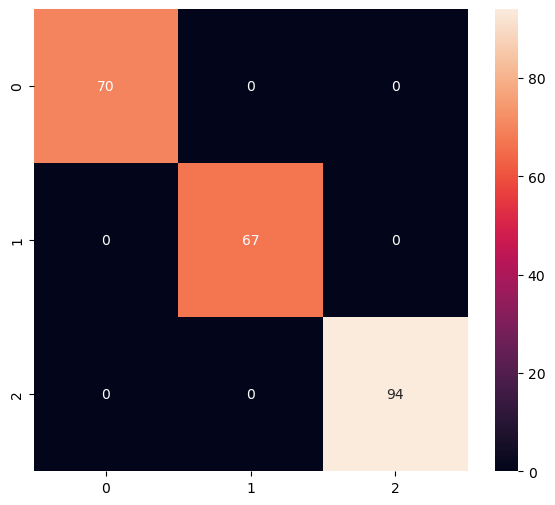

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        94

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [21]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [22]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\thakk\AppData\Local\Temp\tmpiomhxsm2\assets


INFO:tensorflow:Assets written to: C:\Users\thakk\AppData\Local\Temp\tmpiomhxsm2\assets


Saved artifact at 'C:\Users\thakk\AppData\Local\Temp\tmpiomhxsm2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2253259155088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2253259154320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2253259155664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2253259156240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2253261453072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2253261439440: TensorSpec(shape=(), dtype=tf.resource, name=None)


8480

# Inference test

In [23]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [24]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [26]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.05 ms


In [27]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.6054954e-07 9.9999630e-01 3.4940026e-06]
1
